In [49]:
# Initial imports
import panel as pn
from panel.interact import interact
pn.extension('plotly')
import os
import requests
import pandas as pd
from dotenv import load_dotenv
from pathlib import Path
import hvplot.pandas
import json
import matplotlib.pyplot as plt
import finnhub
from pathlib import Path
from MCForecastTools import MCSimulation

In [50]:
import panel as pn
pn.extension('plotly')

# supporting functions

In [51]:
def create_quarters(data):
    data['year'] = data['date'].dt.year
    data['quarter'] = data['date'].dt.quarter
#     data['month'] = data['date'].dt.month
#     data['week'] = data['date'].dt.week

def data_groupby_y(data):
    return data.groupby(['year']).mean().round(2).drop(columns=['quarter'])
def data_groupby_q(data):
    return data.groupby(['year','quarter']).mean().round(2).reset_index()

def create_hvplot_q(data):
    return data.hvplot(xlabel='Date',ylabel='Closing Price',groupby='year')

def create_hvplot_y(data):
    return data.hvplot(xlabel='Date',ylabel='Closing Price')

def data_groupby_m(data):
    return data.groupby(['year','quarter','month']).mean().round(2).reset_index()

def data_groupby_w(data):
    return data.groupby(['year','quarter','month','week']).mean().round(2).reset_index()

# def create_line_chart(data):
#     """
#     Create a line chart based in the data argument.
#     """
#     line_char = plt.figure()
#     line_char.add_subplot(111).plot(data)
#     plt.xlabel('Date')
#     plt.ylabel('Closing Price')
#     plt.legend()
#     plt.close(line_char)
#     return line_char



# importing data

In [52]:
file_path = Path("data/gold.csv")
gold_data = pd.read_csv(file_path)
file_path = Path("data/crude_oil.csv")
crude_data = pd.read_csv(file_path)
file_path = Path("data/treasure_index.csv")
treasure_data = pd.read_csv(file_path)
file_path = Path("data/bitcoin.csv")
bitcoin_data = pd.read_csv(file_path)
file_path = Path("data/cpi.csv")
cpi_data = pd.read_csv(file_path)
file_path = Path("data/bloomberg.csv")
bloomberg_data = pd.read_csv(file_path)

# cleaning data

In [53]:
gold_data = gold_data.iloc[35:]
crude_data = crude_data.iloc[35:]
treasure_data = treasure_data.iloc[35:]
cpi_data = cpi_data.iloc[35:]

bloomberg_data = bloomberg_data.iloc[35:]

In [54]:
gold_data.columns=['date','gold price']
crude_data.columns=['date','oil price']
treasure_data.columns=['date','treasure index price']
cpi_data.columns=['date','cpi price']
bloomberg_data.columns=['date','bloomberg price']
bitcoin_data.columns=['date','bitcoin price','','','','','']
bitcoin_data = bitcoin_data[['date','bitcoin price']]

In [55]:
bitcoin_data['bitcoin price']=bitcoin_data['bitcoin price'].str.replace(',','')

In [56]:
bitcoin_data.head()

,date,bitcoin price
0,"Mar 31, 2021",58741.3
1,"Mar 30, 2021",58771.3
2,"Mar 29, 2021",57616.2
3,"Mar 28, 2021",55765.2
4,"Mar 27, 2021",55862.9


In [57]:
# gold_data = gold_data.reset_index()
# crude_data = crude_data.reset_index()
# treasure_data = treasure_data.reset_index()
# gold_data.head()


In [58]:
# bitcoin_data.head()

In [59]:
gold_data['date'] = pd.to_datetime(gold_data['date'])
crude_data['date'] = pd.to_datetime(crude_data['date'])
treasure_data['date'] = pd.to_datetime(treasure_data['date'])
cpi_data['date'] = pd.to_datetime(cpi_data['date'])
bloomberg_data['date'] = pd.to_datetime(bloomberg_data['date'])
bitcoin_data['date'] = pd.to_datetime(bitcoin_data['date'])

gold_data['gold price']= gold_data['gold price'].astype(float)
crude_data['oil price']= crude_data['oil price'].astype(float)
treasure_data['treasure index price']= treasure_data['treasure index price'].astype(float)
cpi_data['cpi price'] = cpi_data['cpi price'].astype(float)
bloomberg_data['bloomberg price'] = bloomberg_data['bloomberg price'].astype(float)
bitcoin_data['bitcoin price'] = bitcoin_data['bitcoin price'].astype(float)

In [96]:
bloomberg_data.head()

,date,bloomberg price
35,2009-03-26,112.91
36,2009-03-27,110.18
37,2009-03-30,107.16
38,2009-03-31,109.78
39,2009-04-01,108.69


In [60]:
bitcoin_data.head()

,date,bitcoin price
0,2021-03-31,58741.3
1,2021-03-30,58771.3
2,2021-03-29,57616.2
3,2021-03-28,55765.2
4,2021-03-27,55862.9


In [61]:
treasure_data.head()

,date,treasure index price
35,2009-03-26,27.33
36,2009-03-27,27.61
37,2009-03-30,27.14
38,2009-03-31,26.85
39,2009-04-01,26.58


In [62]:
# saving data
gold_data.to_csv('data/gold_data.csv')
crude_data.to_csv('data/crude_data.csv')
cpi_data.to_csv('data/cpi_data.csv')
bitcoin_data.to_csv('data/bitcoin_data.csv')
treasure_data.to_csv('data/treasure_data.csv')
bloomberg_data.to_csv('data/bloomberg_data.csv')


# combining datasets

In [63]:
join_cpi = pd.merge(cpi_data,bitcoin_data,on='date')
join_gold = pd.merge(bitcoin_data,gold_data,on='date')
join_crude = pd.merge(bitcoin_data,crude_data,on='date')
join_bloom = pd.merge(bitcoin_data,bloomberg_data,on='date')
join_treasure = pd.merge(bitcoin_data,treasure_data,on='date')
join_all = pd.merge(gold_data, bitcoin_data, on="date").merge(cpi_data, on='date').merge(crude_data, on='date').set_index('date')

In [81]:
join_all.rename(columns={'gold price': 'gold','bitcoin price':'bitcoin','cpi price':'cpi','oil price':'oil'},inplace=True)
join_all.head()

,gold,bitcoin,cpi,oil
date,,,,
2010-07-19,1181.9,0.1,25.09,81.54
2010-07-20,1191.7,0.1,25.08,81.95
2010-07-21,1191.8,0.1,25.09,81.74
2010-07-22,1195.6,0.1,25.09,83.97
2010-07-23,1187.8,0.1,25.10,83.79


In [97]:
join_gold.head()

,date,bitcoin price,gold price,year,quarter
0,2021-03-26,55036.1,1732.3,2021,1
1,2021-03-25,51322.3,1725.1,2021,1
2,2021-03-24,52325.4,1733.2,2021,1
3,2021-03-23,54452.5,1725.1,2021,1
4,2021-03-22,54158.3,1738.1,2021,1


In [65]:
create_quarters(join_cpi)
create_quarters(join_gold)
create_quarters(join_bloom)
create_quarters(join_treasure)
create_quarters(join_crude)

In [66]:
join_gold.head(10)

,date,bitcoin price,gold price,year,quarter
0,2021-03-26,55036.1,1732.3,2021,1
1,2021-03-25,51322.3,1725.1,2021,1
2,2021-03-24,52325.4,1733.2,2021,1
3,2021-03-23,54452.5,1725.1,2021,1
4,2021-03-22,54158.3,1738.1,2021,1
5,2021-03-19,58088.0,1741.7,2021,1
6,2021-03-18,57656.0,1732.5,2021,1
7,2021-03-17,58913.5,1727.1,2021,1
8,2021-03-16,56889.7,1730.9,2021,1
9,2021-03-15,55791.3,1729.2,2021,1


In [67]:
join_gold_quarter=data_groupby_q(join_gold)
join_crude_quarter=data_groupby_q(join_crude)
join_cpi_quarter=data_groupby_q(join_cpi)
join_treasure_quarter=data_groupby_q(join_treasure)
join_bloom_quarter=data_groupby_q(join_bloom)
join_gold_quarter.head()

,year,quarter,bitcoin price,gold price
0,2010,3,0.10,1259.90
1,2010,4,0.20,1428.06
2,2011,1,0.71,1402.81
3,2011,2,8.87,1519.15
4,2011,3,9.93,1710.02


In [68]:
join_gold_year=data_groupby_y(join_gold)
join_crude_year=data_groupby_y(join_crude)
join_cpi_year=data_groupby_y(join_cpi)
join_treasure_year=data_groupby_y(join_treasure)
join_bloom_year=data_groupby_y(join_bloom)
join_bloom_year.head()

,bitcoin price,bloomberg price
year,,
2010,0.16,142.65
2011,5.73,158.00
2012,8.31,141.64
2013,199.93,131.02
2014,522.15,126.65


In [69]:
join_gold_per_quarter = join_gold_quarter.set_index('quarter')
join_bloom_per_quarter = join_bloom_quarter.set_index('quarter')
join_cpi_per_quarter = join_cpi_quarter.set_index('quarter')
join_treasure_per_quarter = join_treasure_quarter.set_index('quarter')
join_crude_per_quarter = join_crude_quarter.set_index('quarter')


In [71]:
join_gold_per_quarter.head()

,year,bitcoin price,gold price
quarter,,,
3,2010,0.10,1259.90
4,2010,0.20,1428.06
1,2011,0.71,1402.81
2,2011,8.87,1519.15
3,2011,9.93,1710.02


In [72]:
join_gold.drop(columns=['quarter']).set_index('date').hvplot(xlabel='Date',ylabel='Closing Price',groupby='year')

:DynamicMap   [year]
   :NdOverlay   [Variable]
      :Curve   [date]   (value)

In [73]:
create_hvplot_q(join_gold_per_quarter)

:DynamicMap   [year]
   :NdOverlay   [Variable]
      :Curve   [quarter]   (value)

# calculate daily returns

In [89]:
# daily_returns = join_all.pct_change()
# daily_returns.head(10)

In [82]:
join_all.columns = pd.MultiIndex.from_product([join_all.columns, ['close']])

In [95]:
join_all.to_csv('data/join_all.csv')
join_all.head()

,gold,bitcoin,cpi,oil
,close,close,close,close
date,,,,
2010-07-19,1181.9,0.1,25.09,81.54
2010-07-20,1191.7,0.1,25.08,81.95
2010-07-21,1191.8,0.1,25.09,81.74
2010-07-22,1195.6,0.1,25.09,83.97
2010-07-23,1187.8,0.1,25.10,83.79


In [87]:
# Configure a Monte Carlo simulation to forecast three years daily returns
MC_dist = MCSimulation(
    portfolio_data = join_all,
    weights = [.25,.25,.25,.25],
    num_simulation = 300,
    num_trading_days = 252*3
)

In [88]:
# Printing the simulation input data
MC_dist.portfolio_data.head()

gold              bitcoin                 cpi               \
             close daily_return   close daily_return  close daily_return   
date                                                                       
2010-07-19  1181.9          NaN     0.1          NaN  25.09          NaN   
2010-07-20  1191.7     0.008292     0.1          0.0  25.08    -0.000399   
2010-07-21  1191.8     0.000084     0.1          0.0  25.09     0.000399   
2010-07-22  1195.6     0.003188     0.1          0.0  25.09     0.000000   
2010-07-23  1187.8    -0.006524     0.1          0.0  25.10     0.000399   

              oil               
            close daily_return  
date                            
2010-07-19  81.54          NaN  
2010-07-20  81.95     0.005028  
2010-07-21  81.74    -0.002563  
2010-07-22  83.97     0.027282  
2010-07-23  83.79    -0.002144

In [90]:
# Running a Monte Carlo simulation to forecast X years cumulative returns
MC_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002815,1.027142,0.998405,0.990093,0.996598,1.029826,0.983621,1.030637,1.029593,0.993203,...,1.022477,1.014475,0.996870,0.997643,0.998342,1.073531,0.969631,0.962109,1.028269,1.029768
2,1.002401,1.003325,1.058089,1.025772,1.017562,1.046909,1.035869,1.023387,1.053458,1.029517,...,1.044126,0.992291,0.979501,0.989147,1.013287,1.035195,0.952835,0.944467,1.067571,1.024016
3,0.984010,0.973815,1.118161,1.066755,1.017845,1.014807,1.042126,1.053475,1.062783,1.035281,...,1.032705,0.997422,0.968743,0.953705,0.981819,1.033875,0.962844,0.967400,1.142175,1.055720
4,0.988700,0.963343,1.105899,1.092402,0.987585,0.972708,1.057595,1.030514,1.034593,1.057374,...,1.026964,0.996399,0.980432,0.981161,0.984559,1.107969,0.933372,0.936876,1.102804,1.016151
5,1.020255,0.941610,1.129082,1.052613,1.016285,0.944735,1.041089,1.054394,1.046861,1.056750,...,0.985100,0.997326,0.959718,1.041934,0.958130,1.072692,0.919318,0.938221,1.142521,0.988802
6,1.023938,0.985208,1.196182,1.016867,0.998606,0.932403,1.036376,1.017292,1.094318,1.102223,...,0.982786,0.966446,0.985335,1.068849,0.980234,1.126074,0.916841,0.934465,1.074027,0.987796
7,1.006887,0.987237,1.168345,0.996028,0.987808,0.959557,1.083546,1.026621,1.092201,1.135134,...,1.007739,0.950690,0.987806,1.038912,1.007617,1.107504,0.926109,0.921027,1.062119,0.968822
8,1.025548,1.012307,1.178234,1.055238,0.992288,0.931383,1.048112,1.063831,1.072190,1.225858,...,0.987613,0.934611,1.000647,1.013383,1.006185,1.057695,0.901467,0.966499,1.072895,0.940535
9,1.034150,1.075989,1.163045,0.995655,1.011733,0.926446,1.019524,1.015853,1.068956,1.237935,...,0.978290,0.885008,1.030145,1.050814,0.991199,1.055507,0.886613,0.983107,1.111859,0.982890


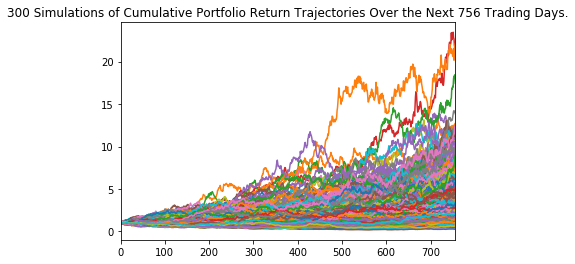

In [91]:
# Plot simulation outcomes
line_plot = MC_dist.plot_simulation()

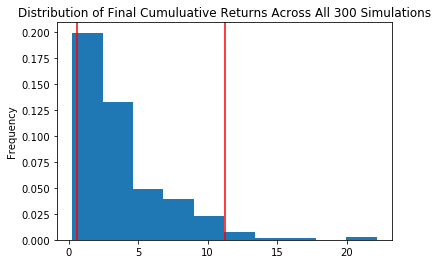

In [92]:
# Plot probability distribution and confidence intervals
dist_plot = MC_dist.plot_distribution()

In [93]:
# Fetch summary statistics from the Monte Carlo simulation results
MC_tbl = MC_dist.summarize_cumulative_return()

# Print summary statistics
print(MC_tbl)

count           300.000000
mean              3.830149
std               3.220543
min               0.261275
25%               1.572879
50%               2.878447
75%               5.036756
max              22.158395
95% CI Lower      0.612044
95% CI Upper     11.280632
Name: 756, dtype: float64


In [79]:
# join_data_year=join_data_quarter.groupby(['year']).mean().drop(columns=['quarter'])

In [80]:
# join_gold_year.hvplot(xlabel='Date',ylabel='Closing Price')

In [81]:
# gold_data_q = gold_data_quarter.set_index('quarter')

In [82]:
# gold_data_q.hvplot(xlabel='Date',ylabel='Closing Price',groupby='year')

In [83]:
# gold_data_year=gold_data_quarter.groupby(['year']).mean().drop(columns=['quarter'])

In [84]:
# gold_data_year.hvplot(xlabel='Date',ylabel='Closing Price')

In [13]:
# def create_hv_line(data):
#     line_char=data.hvplot(xlabel='Date',ylabel='Closing Price',rot=90)
#     return line_char